In [2]:
import os
from pathlib import Path
import numpy as np
import pandas as pd

train_data = pd.read_csv("/home/tae-hyun-ueon/Documents/titanic/train.csv")
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(train_data[["Pclass", "SibSp", "Parch", "Fare"]], train_data["Survived"])
print("Model Coefficients:", reg.coef_)
print("Model Intercept:", reg.intercept_)

Model Coefficients: [-0.16582437 -0.02880357  0.0569487   0.00088876]
Model Intercept: 0.7313788172621785


The ```reg.coef_``` gives out the weight of each feature when it comes to predicting the output. All other features are kept constant while the particular feature is changed to predict the output. 

The ```reg.intercept_``` is the predicted value of survived when all the features are zero. It is a baseline prediction. 

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
data = train_data[["Age", "Survived"]].dropna()
y = data["Survived"]
X = data[["Age"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, shuffle = False)

regressor = LinearRegression().fit(X_train, y_train)

The ```.dropna()``` function can be used to eliminate the NaN values from both the column it's found in and another column that holds its respective values. 

The ```test_size=30``` gets the last 30 samples because the ```shuffle = False``` preserves the order

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.259322393090572
R^2 Score: -0.04192032938176227


The Mean Squared Error is the average of the squared differences between predictions and the true values. 

$\mathrm{MSE}=\frac{1}{n} \sum_{i=1}^n\left(y_i-\hat{y}_i\right)^2$

The $R^2$ is the coefficient of the determination where it shows you how much of the variance of the $y$ in the model explains compared to a baseline that always predicts the mean of $y$. 

$R^2=1-\frac{\sum\left(y_i-\hat{y}_i\right)^2}{\sum\left(y_i-\bar{y}\right)^2}$

where $R^2 = 1$ are perfect predictions and $R^2=0$ are no better than predicted the test mean.

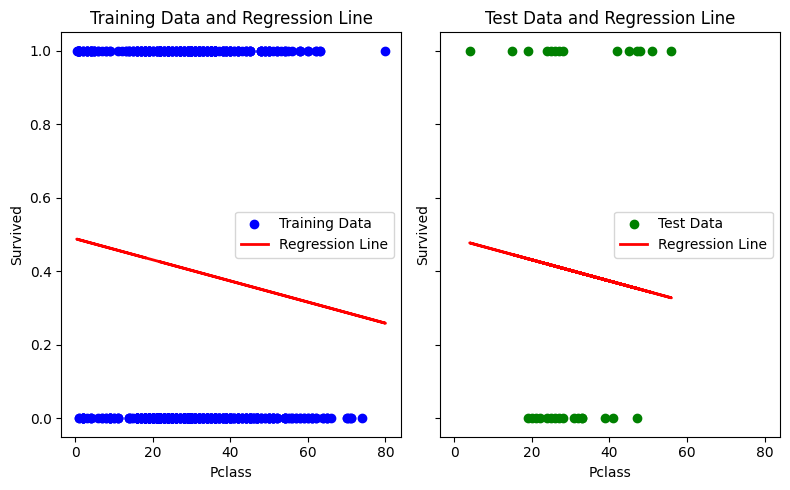

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(8,5), sharex=True, sharey=True)

ax[0].scatter(X_train, y_train, color='blue', label='Training Data')
ax[0].plot(X_train, regressor.predict(X_train), linewidth=2, color='red', label='Regression Line')
ax[0].legend()
ax[0].set_xlabel('Pclass')
ax[0].set_ylabel('Survived')
ax[0].set_title('Training Data and Regression Line')

ax[1].scatter(X_test, y_test, color='green', label='Test Data')
ax[1].plot(X_test, y_pred, linewidth=2, color='red', label='Regression Line')
ax[1].legend()
ax[1].set_xlabel('Pclass')
ax[1].set_ylabel('Survived')
ax[1].set_title('Test Data and Regression Line')
plt.tight_layout()
plt.show()

Linear Regression in general isn't the right tool for this method as it predicts a range of **continuous** values rather than a binary 0 or 1. This means that it can predict things that are outside [0,1] like 0.2, 0.3 etc which are not valid outcomes. 